## 可视化第一课（matplotlib）练习

####  作业提交说明：
- 位置：作业文件统一放置于/0.Teacher/Exercise/Visualization1/下
- 文件名：请先复制该notebook文件，并重新命名为(课程名)+(您姓名的全拼)，并按要求完成后保存
- 时间：课程结束后的第二天前提交。
- 注意：请勿抄袭，移动，修改，删除其他同学和原始空白的练习文件。

In [3]:
%matplotlib inline
import matplotlib as mpl
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## 练习1：航班乘客变化分析
* 从seaborn库中载入flights数据并查看表头

In [2]:
data = sns.load_dataset("flights")
data.head()
# 年份，月份，乘客数

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


* 分析年度乘客总量变化情况（折线图）

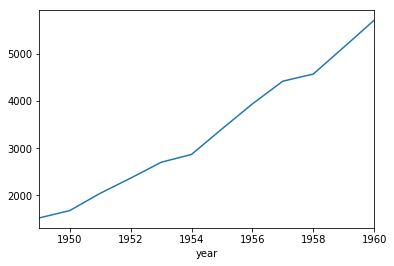

In [4]:
data.groupby("year").passengers.sum().plot()

* 分析乘客在一年中各月份的分布（柱状图）

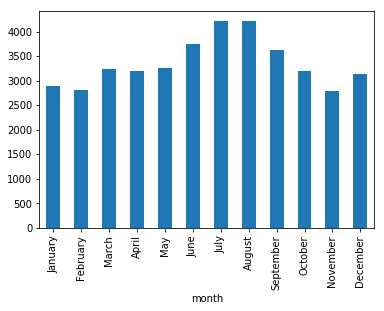

In [9]:
data.groupby("month").passengers.sum().plot(kind="bar")

## 练习2：鸢尾花花型尺寸分析

* 从seaborn库中载入flights数据并查看表头

In [4]:
data = sns.load_dataset("iris")
data.head()
# 萼片长度，萼片宽度，花瓣长度，花瓣宽度，种类

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


* 萼片（sepal）和花瓣（petal）的大小关系（散点图）

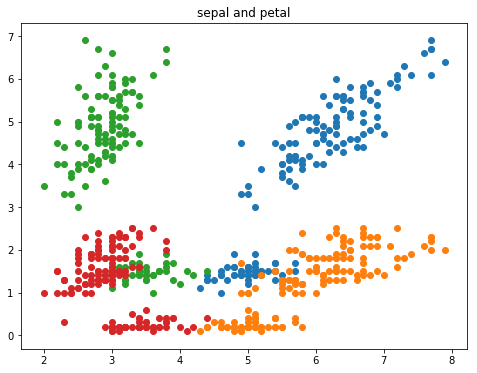

In [13]:
mpl.rc('figure', figsize=(8,6))
fig, axes = plt.subplots()

def speal_petal(data, axes, title):
    axes.scatter(data['sepal_length'], data['petal_length'])
    axes.scatter(data['sepal_length'], data['petal_width'])
    axes.scatter(data['sepal_width'], data['petal_length'])
    axes.scatter(data['sepal_width'], data['petal_width'])
    axes.set_title(title)
#     fig.suptitle('sepal and petal')
    
speal_petal(data, axes, 'sepal and petal')

* 不同种类（species）鸢尾花萼片和花瓣的大小关系（分类散点子图）

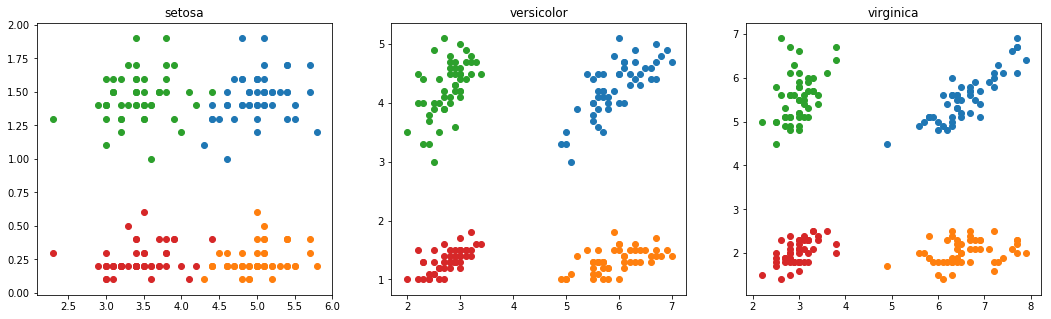

In [14]:
mpl.rc('figure', figsize=(18,5))
ax = []
fig, ax = plt.subplots(1,3)
species = data['species'].unique()

for i in range(len(species)):
    data_species = data.loc[data['species'] == species[i], :]
    speal_petal(data_species, ax[i], species[i])

* 不同种类鸢尾花萼片和花瓣大小的分布情况（柱状图或者箱式图）

## 练习3：餐厅小费情况分析


In [19]:
data = sns.load_dataset("tips")
data.head()
# 总消费，小费，性别，吸烟与否，就餐星期，就餐时间，就餐人数

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


* 小费和总消费之间的关系（散点图）

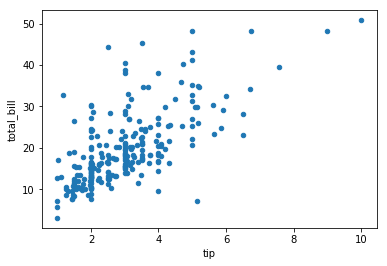

In [20]:
data.plot.scatter(x="tip",y = "total_bill")

* 男性顾客和女性顾客，谁更慷慨（分类箱式图）

In [68]:
df = pd.DataFrame({"Male":data["tip"][data["sex"] == "Male"],"Female":data["tip"][data["sex"] == "Female"]})

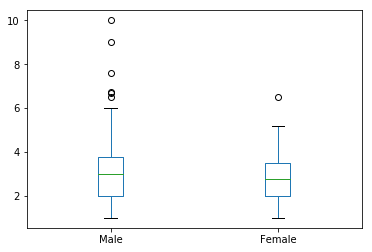

In [70]:
df.plot.box()

* 抽烟与否是否会对小费金额产生影响（分类箱式图）

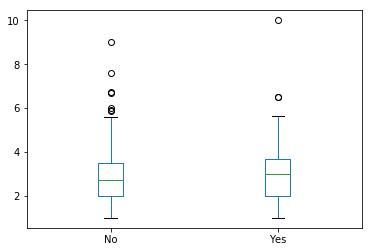

In [93]:
df = pd.DataFrame({"No":data["tip"][data["smoker"] == "No"],"Yes":data["tip"][data["smoker"] == "Yes"]})
df.plot.box()

* 工作日和周末，什么时候顾客给的小费更慷慨（分类箱式图）

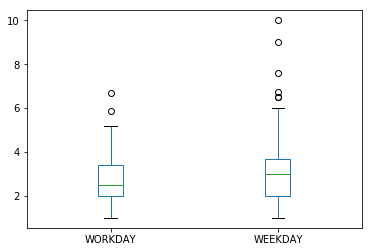

In [103]:
df = pd.DataFrame({"WORKDAY":data["tip"][data["day"].apply(lambda x :x in ["Mon","Tue","Wen","Thur","Fri"])],"WEEKDAY":data["tip"][data["day"].apply(lambda x :x in ["Sat","Sun"])]})
df.plot.box()

* 午饭和晚饭，哪一顿顾客更愿意给小费（分类箱式图）

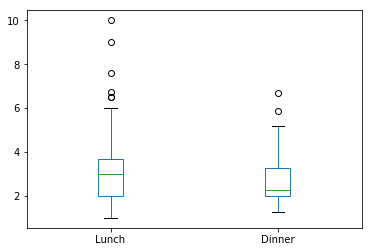

In [104]:
df = pd.DataFrame({"Lunch":data["tip"][data["time"] == "Dinner"],"Dinner":data["tip"][data["time"] == "Lunch"]})
df.plot.box()

* 就餐人数是否会对慷慨度产生影响（分类箱式图）

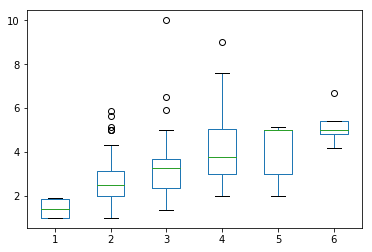

In [107]:
df = pd.DataFrame({"1":data["tip"][data["size"] == 1],
                   "2":data["tip"][data["size"] == 2],
                  "3":data["tip"][data["size"] == 3],
                  "4":data["tip"][data["size"] == 4],
                  "5":data["tip"][data["size"] == 5],
                  "6":data["tip"][data["size"] == 6],
                  })
df.plot.box()

* 性别+抽烟的组合因素对慷慨度的影响（分组柱状图）

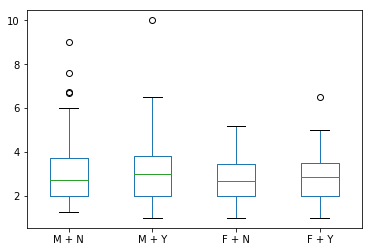

In [110]:
df = pd.DataFrame({"M + N":data["tip"][(data["sex"] == "Male") & (data["smoker"] == "No")],
                  "M + Y":data["tip"][(data["sex"] == "Male") & (data["smoker"] == "Yes")],
                  "F + N":data["tip"][(data["sex"] == "Female") & (data["smoker"] == "No")],
                  "F + Y":data["tip"][(data["sex"] == "Female") & (data["smoker"] == "Yes")],
                  })

df.plot.box()

## 练习4：泰坦尼克号海难幸存状况分析
* 载入数据集

In [140]:
data = sns.load_dataset("titanic")
data.head()
# 幸存与否，仓位等级，性别，年龄，堂兄弟姐妹数，父母子女数，票价，上船港口缩写，仓位等级，人员分类，是否成年男性，所在甲板，上船港口，是否幸存，是否单独乘船

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


* 不同仓位等级中幸存和遇难的乘客比例（堆积柱状图）

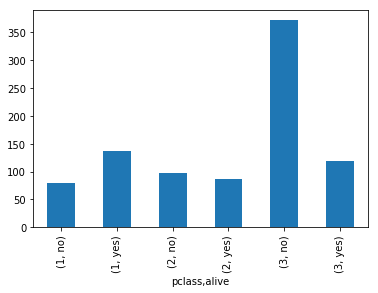

In [143]:
data.groupby(by = ["pclass","alive"]).survived.count().plot(kind="bar")

* 不同性别的幸存比例（堆积柱状图）

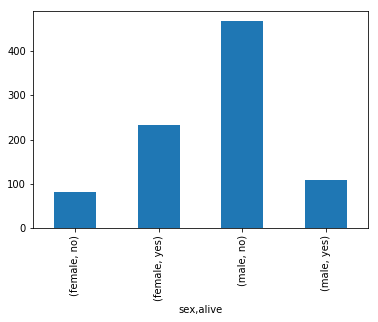

In [145]:
data.groupby(by=["sex","alive"]).survived.count().plot(kind="bar")

* 幸存和遇难乘客的票价分布（分类箱式图）

In [150]:
df = pd.DataFrame({"YES":data["fare"][data["survived"] == 1],
                  "NO":data["fare"][data["survived"] == 0]})

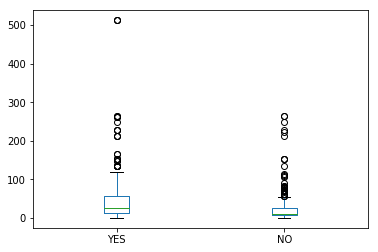

In [151]:
df.plot.box()

* 幸存和遇难乘客的年龄分布（分类箱式图）

In [167]:
df = pd.DataFrame({"YES":data["age"][data["survived"] == 1],
                  "NO":data["age"][data["survived"] == 0]})

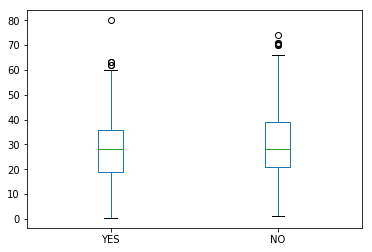

In [168]:
df.plot.box()

* 不同上船港口的乘客仓位等级分布（分组柱状图）

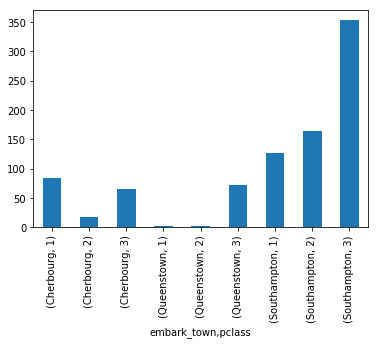

In [173]:
data.groupby(by=["embark_town","pclass"]).survived.count().plot(kind="bar")

* 幸存和遇难乘客堂兄弟姐妹的数量分布（分类箱式图）

In [171]:
df = pd.DataFrame({"YES":data["sibsp"][data["survived"] == 1],
                  "NO":data["sibsp"][data["survived"] == 0]})

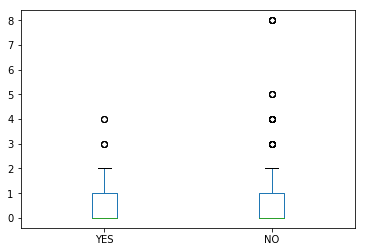

In [172]:
df.plot.box()

* 幸存和遇难乘客父母子女的数量分布（分类箱式图）

In [169]:
df = pd.DataFrame({"YES":data["parch"][data["survived"] == 1],
                  "NO":data["parch"][data["survived"] == 0]})

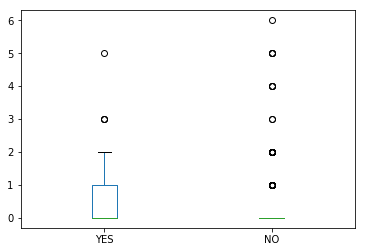

In [170]:
df.plot.box()

* 单独乘船与否和幸存之间有没有联系（堆积柱状图或者分组柱状图）

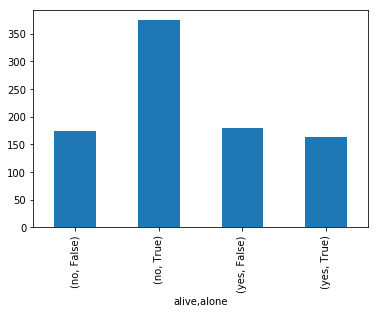

In [174]:
data.groupby(by=["alive","alone"]).survived.count().plot(kind="bar")